<img src="youtube.png" width="100" align="center">

<h1 align="center">Text Data Analysis (Youtube case Study)</h1>


- Sentimental Analysis.
- Dislike vs Views Analysis.
- Trending Video tags on youtube.

In [10]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [11]:
# !pip install --upgrade pip
# !pip install textblob
# !pip install pandas numpy matplotlib seaborn 
# !pip install emoji
# !pip install plotly
# !pip install chart_studio

In [13]:
df = pd.read_csv('UScomments.csv', on_bad_lines="skip", low_memory=False)

In [14]:
df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


## Data Preprocessing
 cleaning data, finding missing values and outliers

In [15]:
df.isnull().sum()
df.dropna(inplace=True)

## Sentimental Analysis
 we're to find out the polarity , subjectivity of comments from youtube case study

In [16]:
from textblob import TextBlob
polarity = []

for comment in df['comment_text']:
    polarity.append(TextBlob(comment).sentiment.polarity)

df['polarity'] = polarity
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## WordCloud Representation of sentiment analysis
identifying the positive, negetive comments from the youtube case study and plotting a worcloud to better visualize the distict comments

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


(-0.5, 399.5, 199.5, -0.5)

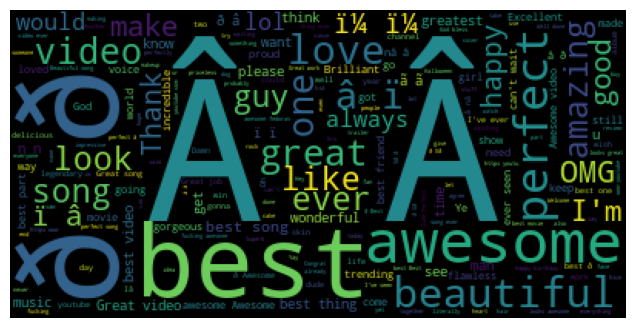

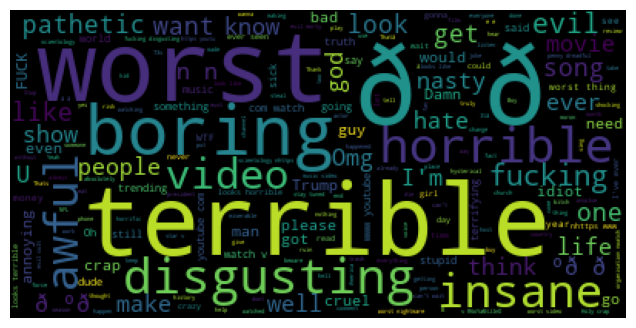

In [7]:
#!pip install wordcloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

# collecting the positive and negative comments
positive_comments = df[df['polarity'] == 1]
negative_comments = df[df['polarity'] == -1]

# wordcloud recieves a string as value (convert series in dataframe to string)
total_comments1 = ' '.join(positive_comments['comment_text'])
total_comments2 = ' '.join(negative_comments['comment_text'])

# wordcloud representing of positive comments
stopword = stopwords.words('english')
word_cloud = WordCloud(stopwords=stopword).generate(total_comments1)
plt.figure(figsize=(12,4))
plt.imshow(word_cloud)
plt.axis('off')

# wordcloud representing of negative comments
word_cloud = WordCloud(stopwords=stopword).generate(total_comments2)
plt.figure(figsize=(12,4))
plt.imshow(word_cloud)
plt.axis('off')




## Emoji Analysis
 performing analysis on emoji's on youtube case study to determine dislikes and views from users

In [18]:

import emoji
from plotly.offline import iplot
import chart_studio.plotly as py
import plotly.graph_objects as go
from collections import Counter

emoji_list = []
for comment in df['comment_text']:
    for c in comment:
        if c in emoji.EMOJI_DATA:
            emoji_list.append(c)
            
# most common emojis in comment
freq = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

#plot frequency of emojis
trace = go.Figure(
        data=[go.Bar(x=emoji_list, y =freq)],
        layout_title_text="A Figure Displayed with fig.show()"
)
# trace.show()

## Collect entire data from youtube

In [17]:
import os
path = r"C:\Users\USER\Downloads\PERSONAL DEV\Data Analytics\Datasets\additional_data"
files = os.listdir(path)
# print(files)

# extract the csv files from the list of data
full_df = pd.DataFrame()
file_csv = [files[i] for i in range(0, len(files), 2)]   # within the range of 0 and the length of csv file using step 2

for file in file_csv:
    current_df = pd.read_csv(path+ "\\" +file, encoding="ISO-8859-1", error_bad_lines=False)
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df])
    
full_df

['CAvideos.csv', 'CA_category_id.json', 'DEvideos.csv', 'DE_category_id.json', 'FRvideos.csv', 'FR_category_id.json', 'GBvideos.csv', 'GB_category_id.json', 'INvideos.csv', 'IN_category_id.json', 'JPvideos.csv', 'JP_category_id.json', 'KRvideos.csv', 'KR_category_id.json', 'MXvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'RU_category_id.json', 'USvideos.csv', 'US_category_id.json']


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US


## Analysing the most Liked category
 peforming analysis on the most liked category of youtube videos

In [ ]:
# read out ctaerogi
category_df = pd.read_csv(r'C:\Users\USER\Downloads\PERSONAL DEV\Data Analytics\Datasets\category_file.txt', sep=':')
category_df.reset_index(inplace=True)
category_df.columns = ['category_id', 'category_name']
category_df.set_index('category_id', inplace=True)
category_df